# fMRI EDA

Let's explore the dataset:  The dataset comes with a very interesting 'demographics.txt' file.  So first we will look at some properties of this file.  Later we can explore the 4D fMRI scans, and join data from that scan with the 'demogrpahics.txt' file.

## Load metadata

In [3]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dylan/anaconda/envs/gp27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
df = pd.read_csv("../../test_data/ds115_metadata/demographics.txt", sep='\t')
# These are objects that need to be converted
#df[['sans25','d4prime','TRAILB','WCSTPSVE', 'WAIS_VOCAB_SCALED', 'WAIS_MATRICS_SCALE', \
#    'LOGIALMEMORY_SCALE', 'FAMILYPICT_SCALE', 'LNS_SCALE', 'SST_SCALE', \
#   'z_iq_4grp', 'z_em_4grp', 'fyrschool']]
df.sans25 = df.sans25.apply(pd.to_numeric, errors='coerce')
df.d4prime = df.d4prime.apply(pd.to_numeric, errors='coerce')
df.TRAILB = df.TRAILB.apply(pd.to_numeric, errors='coerce')
df.WCSTPSVE = df.WCSTPSVE.apply(pd.to_numeric, errors='coerce')
df.WAIS_VOCAB_SCALED = df.WAIS_VOCAB_SCALED.apply(pd.to_numeric, errors='coerce')
df.WAIS_MATRICS_SCALE = df.WAIS_MATRICS_SCALE.apply(pd.to_numeric, errors='coerce')
df.LOGIALMEMORY_SCALE = df.LOGIALMEMORY_SCALE.apply(pd.to_numeric, errors='coerce')
df.FAMILYPICT_SCALE = df.FAMILYPICT_SCALE.apply(pd.to_numeric, errors='coerce')
df.LNS_SCALE = df.LNS_SCALE.apply(pd.to_numeric, errors='coerce')
df.SST_SCALE = df.SST_SCALE.apply(pd.to_numeric, errors='coerce')
df.z_iq_4grp = df.z_iq_4grp.apply(pd.to_numeric, errors='coerce')
df.z_em_4grp = df.z_em_4grp.apply(pd.to_numeric, errors='coerce')
df.fyrschool = df.fyrschool.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 49 columns):
subcode               102 non-null object
condit                102 non-null object
gender                102 non-null object
race                  102 non-null object
age                   102 non-null float64
yrschool              102 non-null int64
saps7                 101 non-null float64
saps20                101 non-null float64
saps25                101 non-null float64
saps34                101 non-null float64
sans8                 101 non-null float64
sans13                101 non-null float64
sans17                101 non-null float64
sans22                101 non-null float64
sans25                100 non-null float64
d4prime               94 non-null float64
LFLUNOVS              101 non-null float64
CFLUNOVA              101 non-null float64
TRAILB                98 non-null float64
WCSTPSVE              99 non-null float64
WAIS_VOCAB_SCALED     98 non-null float64
WA

It is not so clear what some of these columns mean. Let's take a look at some of the obvious ones:

In [79]:
df_oc = df[['subcode', 'condit', 'gender', 'race','age', 'yrschool',\
            'fyrschool', 'myrschool', 'parent_yrsschool']]

In [80]:
df_oc.head()

,subcode,condit,gender,race,age,yrschool,fyrschool,myrschool,parent_yrsschool
0,sub001,SCZ,MALE,WHITE,28.9610,12,13.0,12.0,13.0
1,sub002,SCZ-SIB,MALE,WHITE,26.8419,16,19.0,14.0,19.0
2,sub003,SCZ-SIB,FEMALE,WHITE,29.4648,18,NaN,NaN,NaN
3,sub004,SCZ-SIB,MALE,WHITE,25.8344,18,14.0,18.0,18.0
4,sub005,SCZ,FEMALE,WHITE,25.6454,14,13.0,14.0,14.0


In [81]:
df_oc.condit.value_counts()

SCZ-SIB    37
SCZ        23
CON        21
CON-SIB    21
Name: condit, dtype: int64

In [82]:
df_oc.gender.value_counts()

MALE      61
FEMALE    41
Name: gender, dtype: int64

In [83]:
df_oc.race.value_counts()

WHITE    58
AA       44
Name: race, dtype: int64

In [84]:
df_oc[['age', 'yrschool','fyrschool', 'myrschool', 'parent_yrsschool']].describe()

,age,yrschool,fyrschool,myrschool,parent_yrsschool
count,102.000000,102.000000,89.000000,101.000000,101.000000
mean,22.901533,12.794118,14.157303,14.099010,14.782178
std,4.376460,2.840089,1.947603,2.202294,2.128868
min,11.668700,3.000000,12.000000,9.000000,9.000000
25%,19.967175,12.000000,13.000000,12.000000,13.000000
50%,23.095150,13.000000,14.000000,14.000000,14.000000
75%,26.103375,15.000000,15.000000,16.000000,16.000000
max,30.787100,19.000000,21.000000,19.000000,21.000000


Let's do some groupby's to get an idea of the distribution of data:

In [85]:
df_oc.groupby(['condit', 'race', 'gender']).count()

subcode  age  yrschool  fyrschool  myrschool  \
condit  race  gender                                                 
CON     AA    FEMALE        4    4         4          4          4   
              MALE          7    7         7          5          7   
        WHITE FEMALE        4    4         4          4          4   
              MALE          6    6         6          6          6   
CON-SIB AA    FEMALE        4    4         4          3          4   
              MALE          4    4         4          2          4   
        WHITE FEMALE        5    5         5          5          5   
              MALE          8    8         8          8          8   
SCZ     AA    FEMALE        1    1         1          1          1   
              MALE          8    8         8          6          8   
        WHITE FEMALE        5    5         5          5          5   
              MALE          9    9         9          9          9   
SCZ-SIB AA    FEMALE       10   10        10          7         10   
              MALE          6    6         6          4          6   
        WHITE FEMALE        8    8         8          7          7   
              MALE         13   13        13         13         13   

                      parent_yrsschool  
condit  race  gender                    
CON     AA    FEMALE                 4  
              MALE                   7  
        WHITE FEMALE                 4  
              MALE                   6  
CON-SIB AA    FEMALE                 4  
              MALE                   4  
        WHITE FEMALE                 5  
              MALE                   8  
SCZ     AA    FEMALE                 1  
              MALE                   8  
        WHITE FEMALE                 5  
              MALE                   9  
SCZ-SIB AA    FEMALE                10  
              MALE                   6  
        WHITE FEMALE                 7  
              MALE                  13

In [86]:
df_oc.groupby(['condit', 'race', 'gender']).mean()

age   yrschool  fyrschool  myrschool  \
condit  race  gender                                               
CON     AA    FEMALE  18.444925  10.750000  14.000000  14.250000   
              MALE    19.915914  11.285714  14.400000  14.571429   
        WHITE FEMALE  20.640650  13.500000  14.000000  13.750000   
              MALE    22.759300  13.666667  15.000000  13.500000   
CON-SIB AA    FEMALE  20.036950  11.750000  14.333333  15.000000   
              MALE    21.515400  10.250000  12.000000  14.000000   
        WHITE FEMALE  19.653400  12.600000  13.400000  13.800000   
              MALE    23.068450  14.000000  14.625000  13.500000   
SCZ     AA    FEMALE  25.377100  13.000000  12.000000  12.000000   
              MALE    22.826837  11.125000  13.500000  12.875000   
        WHITE FEMALE  25.557280  13.000000  13.000000  13.200000   
              MALE    24.686600  12.444444  14.888889  15.777778   
SCZ-SIB AA    FEMALE  23.564410  12.200000  12.714286  13.100000   
              MALE    24.056117  11.333333  14.000000  12.333333   
        WHITE FEMALE  26.747425  15.375000  15.285714  14.857143   
              MALE    23.285008  14.769231  14.692308  15.692308   

                      parent_yrsschool  
condit  race  gender                    
CON     AA    FEMALE         15.250000  
              MALE           15.285714  
        WHITE FEMALE         14.500000  
              MALE           15.000000  
CON-SIB AA    FEMALE         15.500000  
              MALE           14.000000  
        WHITE FEMALE         14.000000  
              MALE           14.875000  
SCZ     AA    FEMALE         12.000000  
              MALE           13.375000  
        WHITE FEMALE         13.600000  
              MALE           16.444444  
SCZ-SIB AA    FEMALE         13.300000  
              MALE           13.166667  
        WHITE FEMALE         15.714286  
              MALE           16.384615

The column 'parent_yrsschool' looks to be the maximum between 'fyrschool' and 'myrschool':

In [35]:
df_oc[['fyrschool','myrschool', 'parent_yrsschool']].head()

,fyrschool,myrschool,parent_yrsschool
0,13,12.0,13.0
1,19,14.0,19.0
2,NaN,NaN,NaN
3,14,18.0,18.0
4,13,14.0,14.0


### Let's have a look the at mysterious columns

In [87]:
df[['WAIS_VOCAB_SCALED','WAIS_MATRICS_SCALE']].describe()

,WAIS_VOCAB_SCALED,WAIS_MATRICS_SCALE
count,98.000000,98.000000
mean,8.918367,11.397959
std,2.909896,2.469358
min,3.000000,1.000000
25%,6.250000,10.000000
50%,9.000000,12.000000
75%,11.000000,13.000000
max,16.000000,16.000000


In [88]:
df.d4prime[:10]

0    1.451
1    1.952
2      NaN
3    3.669
4    1.053
5      NaN
6    2.393
7    1.278
8    1.585
9    3.669
Name: d4prime, dtype: float64

In [91]:
df[['condit','z_iq_4grp','z_wm_4grp','z_em_4grp','z_ra_4grp',\
            'z_pos_4grp','z_neg_4grp','z_dis_4grp']].head()

,condit,z_iq_4grp,z_wm_4grp,z_em_4grp,z_ra_4grp,z_pos_4grp,z_neg_4grp,z_dis_4grp
0,SCZ,-1.24491,-0.27661,-0.76503,0.09429,0.21666,0.95488,0.29352
1,SCZ-SIB,0.15561,0.34491,1.06293,0.66455,-0.44949,-0.60788,-0.52139
2,SCZ-SIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SCZ-SIB,0.71582,1.51924,0.35244,0.73144,-0.64121,-0.79106,-0.52139
4,SCZ,0.15561,-0.90635,-0.67876,0.53427,1.15528,0.03145,0.60316


In [100]:
test_cols = df.columns.tolist()

In [101]:
test_cols.remove('subcode')
test_cols.remove('condit')
test_cols.remove('gender')
test_cols.remove('race')
test_cols.remove('age')
test_cols.remove('yrschool')
test_cols.remove('fyrschool')
test_cols.remove('myrschool')
test_cols.remove('parent_yrsschool')
test_cols.remove('nback0_nont')
test_cols.remove('nback0_targ')
test_cols.remove('nback1_nont')
test_cols.remove('nback1_targ')
test_cols.remove('nback2_nont')
test_cols.remove('nback2_targ')
test_cols.remove('nback0_nont_medrt')
test_cols.remove('nback0_targ_medrt')
test_cols.remove('nback1_nont_medrt')
test_cols.remove('nback1_targ_medrt')
test_cols.remove('nback2_nont_medrt')
test_cols.remove('nback2_targ_medrt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f06ab10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12006d390>]], dtype=object)

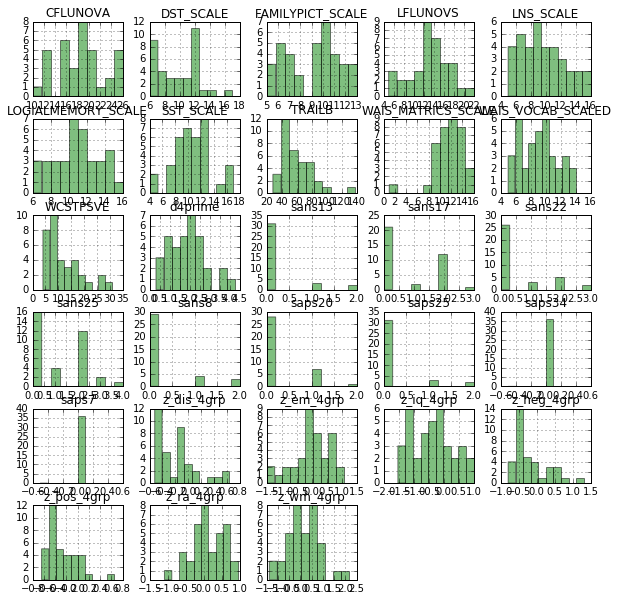

In [111]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
df[df['condit']=='SCZ'][test_cols].hist(ax=ax, alpha=0.5)
df[df['condit']=='SCZ-SIB'][test_cols].hist(ax=ax, color='green', alpha=0.5)

In [112]:
df.corr()

,age,yrschool,saps7,saps20,saps25,saps34,sans8,sans13,sans17,sans22,...,nback1_nont,nback1_targ,nback2_nont,nback2_targ,nback0_nont_medrt,nback0_targ_medrt,nback1_nont_medrt,nback1_targ_medrt,nback2_nont_medrt,nback2_targ_medrt
age,1.000000,0.621101,0.071774,0.149467,-0.060875,0.146168,0.104194,0.153946,0.229285,0.222028,...,0.042857,0.076809,-0.036656,0.028358,-0.162555,-0.132726,-0.151624,-0.129600,-0.040372,-0.051568
yrschool,0.621101,1.000000,-0.050772,-0.101055,-0.116851,-0.165459,-0.168465,-0.113270,-0.050093,-0.067982,...,0.093339,0.281478,0.145127,0.248361,-0.209914,-0.109962,-0.208616,-0.152712,-0.128514,-0.119993
saps7,0.071774,-0.050772,1.000000,0.768508,0.363877,0.292128,0.452292,0.413806,0.538348,0.646150,...,-0.040325,-0.045578,-0.135232,-0.101128,0.019749,-0.082518,0.076979,0.071479,0.112127,0.033866
saps20,0.149467,-0.101055,0.768508,1.000000,0.339676,0.484579,0.569140,0.444512,0.655211,0.687408,...,-0.057211,-0.238363,-0.170991,-0.293880,0.082076,0.061440,0.128741,0.221616,0.080620,0.110877
saps25,-0.060875,-0.116851,0.363877,0.339676,1.000000,0.330221,0.364241,0.361649,0.398151,0.332739,...,-0.242871,-0.165713,-0.269286,-0.250556,0.229225,0.154257,0.256695,0.261144,0.211365,0.145807
saps34,0.146168,-0.165459,0.292128,0.484579,0.330221,1.000000,0.526198,0.627751,0.453136,0.380009,...,-0.152654,-0.352548,-0.257554,-0.438540,0.212920,0.258659,0.225314,0.307757,0.216580,0.221007
sans8,0.104194,-0.168465,0.452292,0.569140,0.364241,0.526198,1.000000,0.692565,0.595161,0.571863,...,-0.104697,-0.227075,-0.198385,-0.261484,0.045870,0.053093,0.132346,0.260743,0.178073,0.174606
sans13,0.153946,-0.113270,0.413806,0.444512,0.361649,0.627751,0.692565,1.000000,0.553316,0.548668,...,-0.165217,-0.325865,-0.239911,-0.315061,0.095863,0.089905,0.117809,0.243100,0.250119,0.212019
sans17,0.229285,-0.050093,0.538348,0.655211,0.398151,0.453136,0.595161,0.553316,1.000000,0.675543,...,-0.269713,-0.312440,-0.277664,-0.353925,0.020469,0.064827,0.039517,0.151426,0.090924,0.166856
sans22,0.222028,-0.067982,0.646150,0.687408,0.332739,0.380009,0.571863,0.548668,0.675543,1.000000,...,-0.268827,-0.302557,-0.314469,-0.307916,-0.009780,-0.000605,0.111081,0.224689,0.163608,0.204392


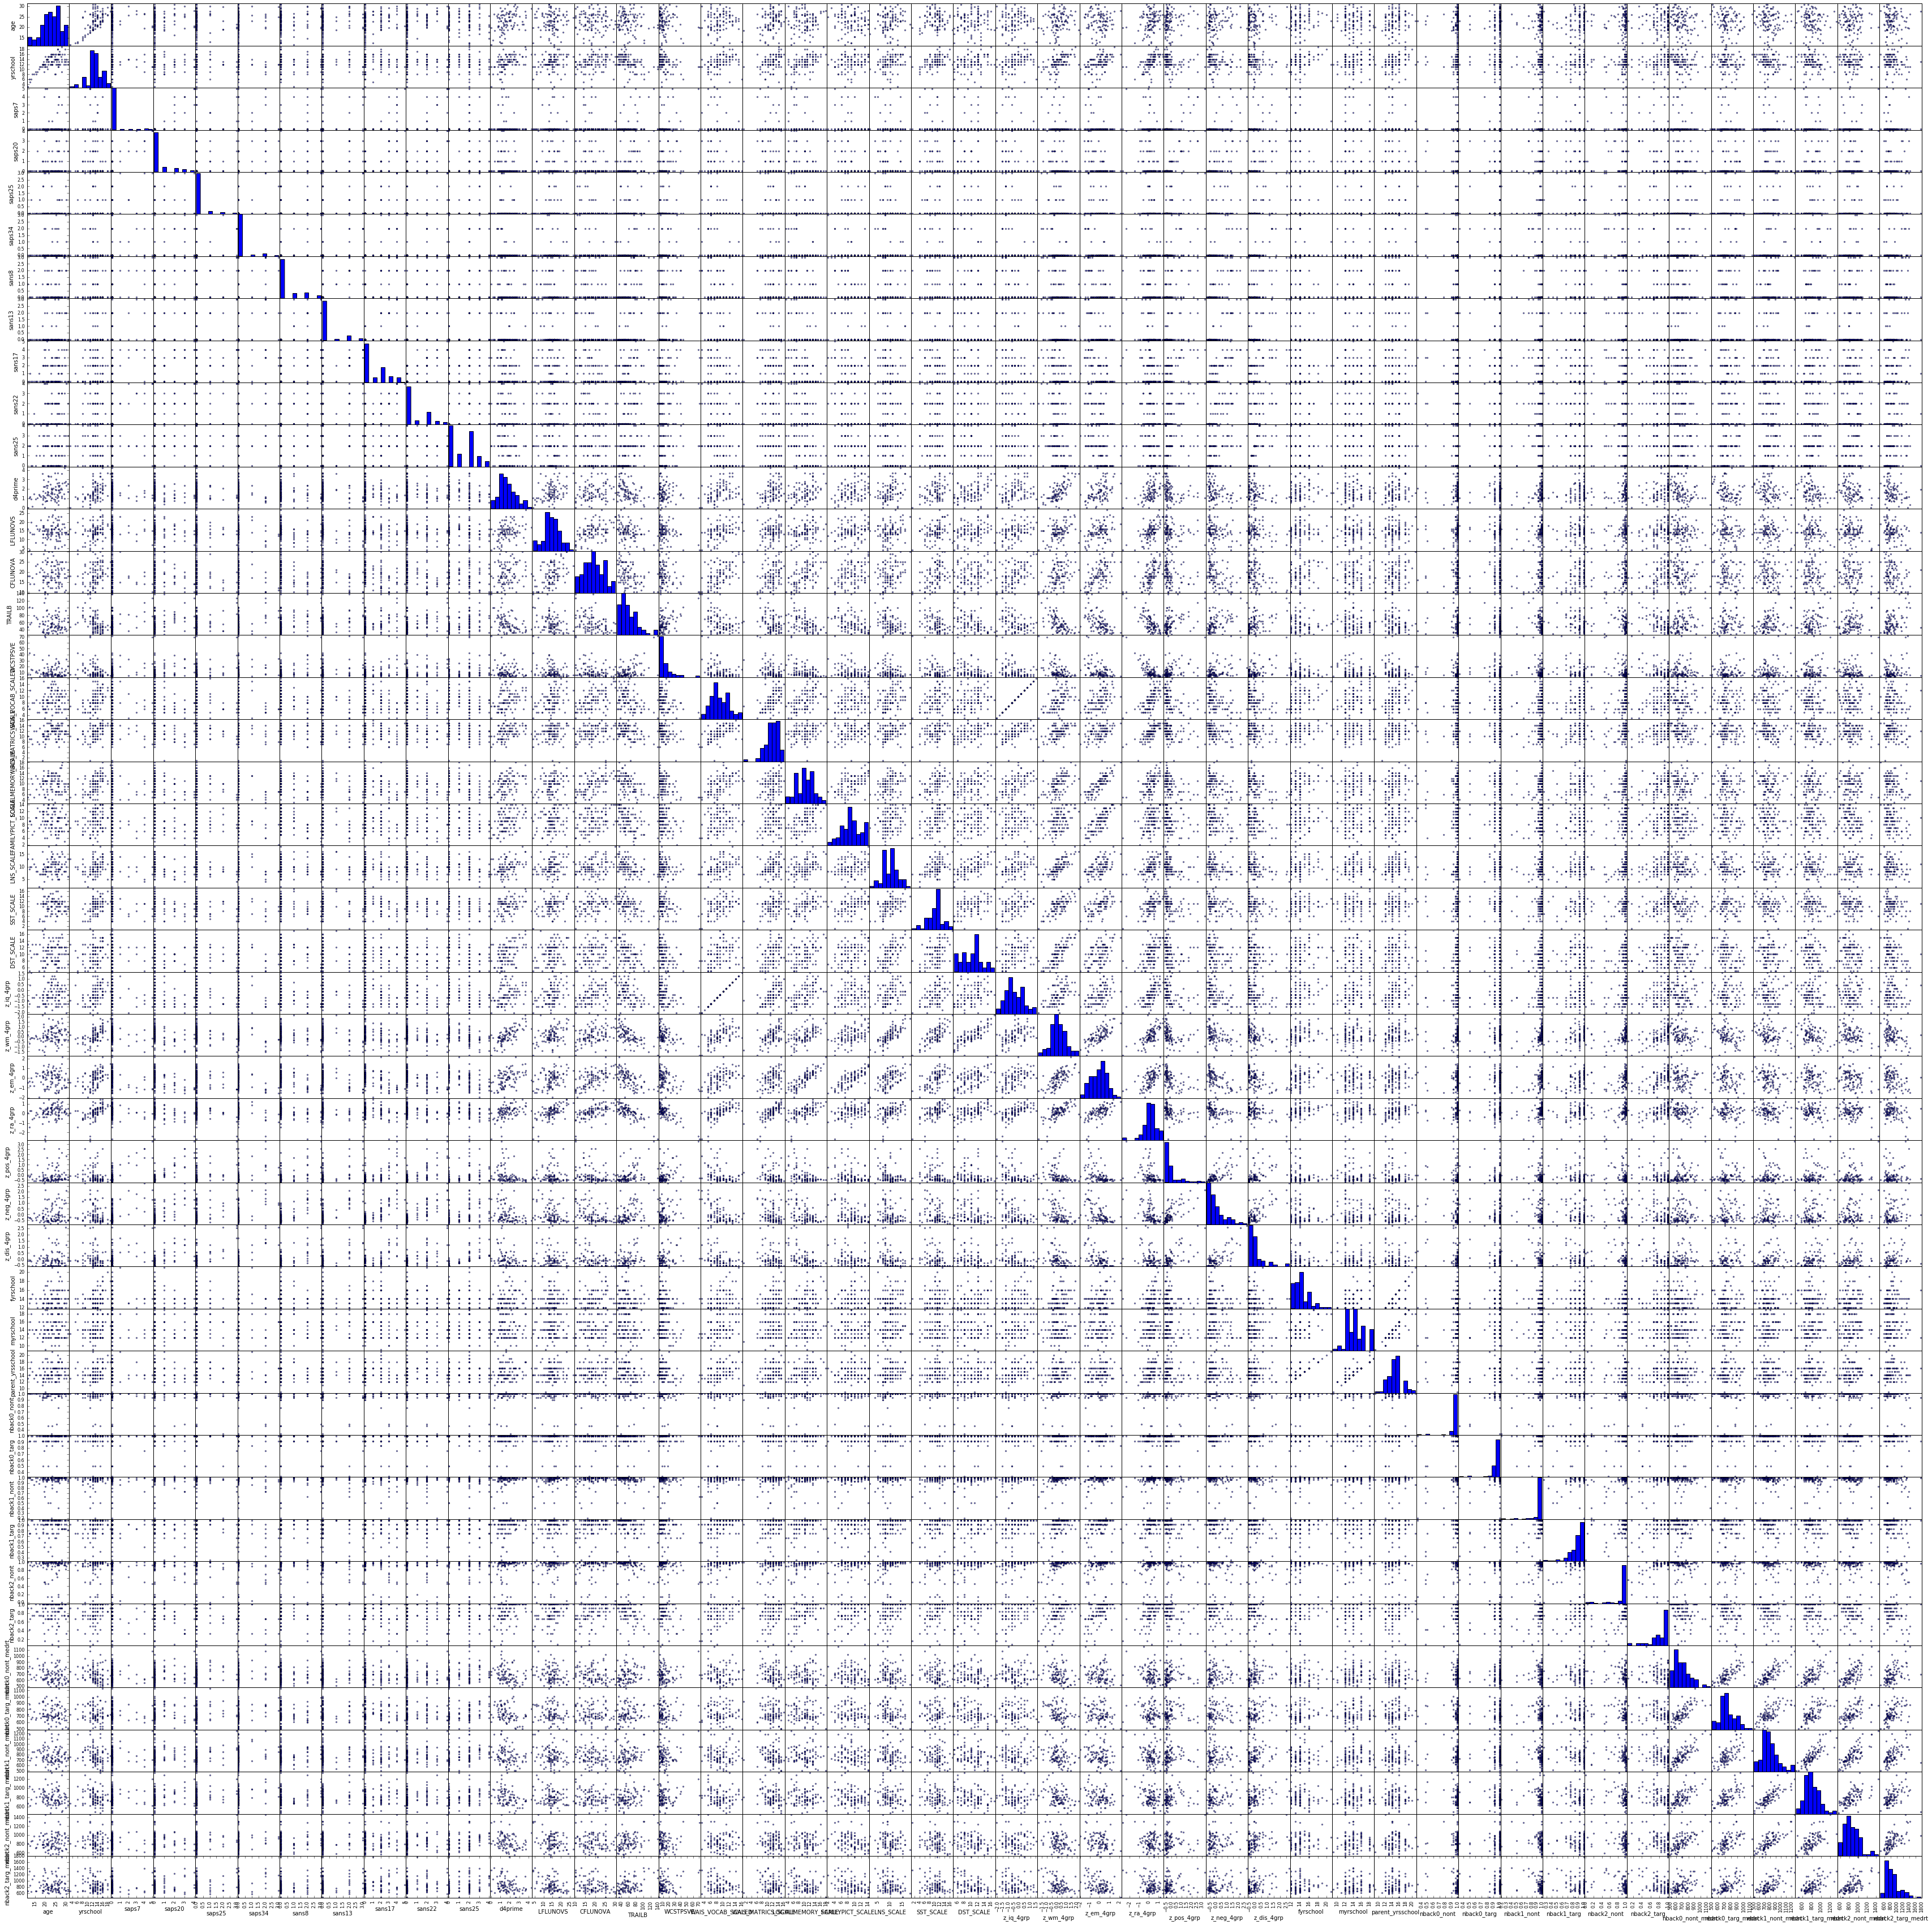

In [116]:
fig = plt.figure(figsize=(60, 60))
ax = fig.add_subplot(111)
smplot = scatter_matrix(df, ax=ax)
#plt.savefig('scatter_fig.png')

### Null Values

Possibly impute missing values -- KNN, or other method. With a small dataset we would really like to have these data points, but should have statistical backing for such a venture.  Perhaps test the predictive power with and without imputation (dropping the rows...).

In [5]:
df[df.isnull().any(axis=1)].T

,2,5,14,15,18,20,21,22,23,27,...,71,74,75,76,83,84,85,86,87,95
subcode,sub003,sub006,sub015,sub016,sub019,sub021,sub022,sub023,sub024,sub028,...,sub072,sub075,sub076,sub077,sub084,sub085,sub086,sub087,sub088,sub096
condit,SCZ-SIB,SCZ-SIB,CON,CON-SIB,SCZ-SIB,CON-SIB,CON-SIB,CON,SCZ-SIB,SCZ-SIB,...,CON,SCZ-SIB,SCZ,SCZ,SCZ-SIB,SCZ,SCZ-SIB,CON-SIB,CON,SCZ
gender,FEMALE,FEMALE,MALE,FEMALE,FEMALE,MALE,MALE,MALE,MALE,MALE,...,MALE,FEMALE,FEMALE,FEMALE,FEMALE,MALE,MALE,FEMALE,MALE,MALE
race,WHITE,WHITE,AA,AA,AA,WHITE,WHITE,WHITE,WHITE,WHITE,...,WHITE,AA,WHITE,WHITE,AA,AA,AA,WHITE,WHITE,AA
age,29.4648,22.8172,18.9706,16.9199,27.6632,23.373,25.1499,19.0883,24.7447,18.6229,...,27.6468,30.7488,16.1725,29.7221,19.9836,21.473,24.8378,15.4716,17.6865,26.0315
yrschool,18,16,12,10,9,16,16,12,14,12,...,13,13,9,12,12,13,8,9,11,12
saps7,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
saps20,NaN,1,1,0,1,0,0,0,0,0,...,0,0,2,0,0,2,1,0,0,0
saps25,NaN,0,2,0,1,0,0,0,0,0,...,0,0,0,2,0,3,0,0,0,0
saps34,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [119]:
102 - 35

67

In [120]:
19 + 28 + 10 + 17

74